In [2]:
!pip install palettable

In [50]:
# вытаскиваю все возможные импорты чтобы дальше не думать об этом
import urllib, requests, socket, re, lxml, io, bs4, sqlite3, pandas, sqlalchemy
from requests.compat import urljoin, quote_plus, urlparse, unquote
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
import re
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

# **Маркетинговая стратегия. Поиск суперзвезды.**

Одна из основных стратегий продвижения нашей команды – коллабы со знаменитыми волейболистами и волейбольными командами. В этом файле – процесс обработки информации об этом: таблица с показателями спортсменов и ее дальнейшая визуализация (она пока в процессе :) но тоже скоро здесь появится). Также я подумала, что так как мы работаем с командами, + фанаты часто болеют за конкретные команды, надо сделать анализ того, с какими командами можно коллабиться. Для этого я для каждого спортсмена из таблицы захожу на его страницу и вытаскиваю инфу о клубе, в котором он играет (гистограмма для этой штуки тоже скоро появится). При разработке кода если долго не могла найти ошибку, консультировалась с чатомГПТ, что могло пойти не так, или просила совета у сокомандников.

Анализ рейтингов профессиональной лиги: здесь хотим найти лучших волейболистов, чтобы рассмотреть возможность делать коллабы с ними. Аналогично хоти посмотреть на крутые команды и количество топ-игроков в них.

In [70]:
url = 'https://volley.ru/calendar/01J1VV7JAR7KZS011D2BDE00D5/statistics'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

# достаем имена
html_names = soup.find_all('td', {'data-field': 'name'})
names = []
for i in html_names:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('a')
  names.append(s[0].text)

# результаты подач
html_serves = soup.find_all('td', {'data-field': 'total_serve_point'})
serves = []
for i in html_serves[1:]:
  serves.append(i.text)

# процент отличных приемов
html_digs = soup.find_all('td', {'class': 'stat-table-5', 'data-field': 'total_receive_excellent'})
digs = []
for i in html_digs[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    digs.append(s)
  else:
    digs.append('0')

# процент эффективных атак
html_hits = soup.find_all('td', {'class': 'stat-table-6', 'data-field': 'total_attack_point_percent'})
hits = []
for i in html_hits[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    hits.append(s)
  else:
    hits.append('0')

# очки на блоке
html_blocks = soup.find_all('td', {'class': 'stat-table-7', 'data-field': 'total_block'})
blocks = []
for i in html_blocks[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    blocks.append(s)
  else:
    blocks.append('0')

print(names)

# переведем все строки в числа, чтобы потом хорошо с ними работалось
sserves = []
for i in range(len(names)):
    sserves.append(int(serves[i]))
print(sserves)

ddigs = []
for i in range(len(names)):
    ddigs.append(int(digs[i]))
print(ddigs)

hhits = []
for i in range(len(names)):
    hhits.append(int(hits[i]))
print(hhits)

bblocks = []
for i in range(len(names)):
    bblocks.append(int(blocks[i]))
print(bblocks)


summ = []
for i in range(len(names)):
    summ.append(int(serves[i])+int(digs[i])+int(hits[i])+int(blocks[i]))
print(summ)

['Бабкевич Владислав', 'Железняков Павел', 'Мурашко Роман', 'Сиденко Егор', 'Сурмачевский Андрей', 'Дмитриев Семен', 'Папазов Виталий', 'Тетюхин Павел', 'Капранов Василий', 'Пакшин Роман', 'Мергарехо Осниель', 'Янт Марлон', 'Хлякин Михаил', 'Зубов Николай', 'Аль Хачдади Мохамед', 'Волков Дмитрий', 'Авдоченко Павел', 'Сапожков Максим', 'Поталюк Роман', 'Соколов Цветан', 'Рыбаков Евгений', 'Казаченков Илья', 'Дикарев Виталий', 'Маркин Александр', 'Фиэль Родригес Давид', 'Морозов Никита', 'Лызик Дмитрий', 'Ивович Марко', 'Воронков Федор', 'Курбанов Омар', 'Родичев Алексей', 'Бочаров Максим', 'Лабинский Михаил', 'Клец Кирилл', 'Богдан Денис', 'Клюка Егор', 'Чжан Цзинъинь', 'Заболотников Георгий', 'Сподобец Илья', 'Урсов Кирилл', 'Захватенков Александр', 'Шахбанмирзаев Ражабдибир', 'Крсманович Петар', 'Пискарев Иван', 'Эннс Корней', 'Пипуныров Матвей', 'Масько Артем', 'Подлесных Ярослав', 'Максимов Антон', 'Шкулявичус Романас', 'Пятыркин Александр', 'Бирюков Денис', 'Жук Дмитрий', 'Куркаев 

In [79]:
# хочу красивую гистограмму с накопом по этим данным.

mpldf = pd.DataFrame({
    'Игрок': names,
    'Подачи': sserves,
    'Приемы': ddigs,
    'Атаки': hhits,
    'Блоки': bblocks

})
mpldf.index = mpldf.index + 1
#topmpldf = mpldf[:30] # чтобы не утонуть в данных, смотрю только среди топов, дальше показатели похуже
# я построила графики и поняла, что это очень криво смотрится, если не отсортировано. в добрый путь:
mpldf['Сумма'] = summ
smpldf = mpldf.sort_values(by='Сумма', ascending=False)
smpldf

,Игрок,Подачи,Приемы,Атаки,Блоки,Сумма
5,Сурмачевский Андрей,69,18,47,54,188
25,Фиэль Родригес Давид,16,27,60,78,181
23,Дикарев Виталий,20,13,54,86,173
27,Лызик Дмитрий,43,20,60,49,172
182,Голованов Даниил,3,100,66,0,169
...,...,...,...,...,...,...
230,Кириллов Илья,0,0,0,0,0
238,Граханцев Тимофей,0,0,0,0,0
237,Аршинов Роман,0,0,0,0,0
235,Красильников Александр,0,0,0,0,0


from matplotlib import pyplot as plt
smpldf['Подачи'].plot(kind='hist', bins=20, title='Подачи')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smpldf['Приемы'].plot(kind='hist', bins=20, title='Приемы')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smpldf['Атаки'].plot(kind='hist', bins=20, title='Атаки')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smpldf['Блоки'].plot(kind='hist', bins=20, title='Блоки')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smpldf.plot(kind='scatter', x='Подачи', y='Приемы', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smpldf.plot(kind='scatter', x='Приемы', y='Атаки', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smpldf.plot(kind='scatter', x='Атаки', y='Блоки', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smpldf.plot(kind='scatter', x='Блоки', y='Сумма', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
smpldf['Подачи'].plot(kind='line', figsize=(8, 4), title='Подачи')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
smpldf['Приемы'].plot(kind='line', figsize=(8, 4), title='Приемы')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
smpldf['Атаки'].plot(kind='line', figsize=(8, 4), title='Атаки')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
smpldf['Блоки'].plot(kind='line', figsize=(8, 4), title='Блоки')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
smpldf['Подачи'].plot(kind='hist', bins=20, title='Подачи')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [82]:
# в этой ячейке пока чисто код с лекции

df = px.data.gapminder()

fig = px.histogram(df[df['year'] == 2007],
                   x='pop',              # Столбец с численностью населения
                   color='continent',    # Цветовая группировка по континентам
                   hover_data=['country', 'year', 'gdpPercap'],  # Дополнительные данные при наведении
                   nbins=500,             # Количество бинов для гистограммм
                   #barmode='group',
                   #barmode='overlay'
                  )

fig.update_layout(height=500, width=1200,
                  title='Распределение численности населения по континентам в 2007 году',
                  xaxis_title='Численность населения',
                  yaxis_title='Частота',
                  legend_title='Континент',
                  xaxis=dict(range=[0, 5 * 10**7])  # Устанавливаем диапазон по оси X
                  )

fig.show()

ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [72]:
mpldf_melted = mpldf.melt(id_vars=['Игрок'], var_name='Тип показателя', value_name='Значение')
print(mpldf_melted)

                    Игрок Тип показателя  Значение
0      Бабкевич Владислав         Подачи        30
1        Железняков Павел         Подачи        15
2           Мурашко Роман         Подачи        42
3            Сиденко Егор         Подачи        24
4     Сурмачевский Андрей         Подачи        69
...                   ...            ...       ...
1285      Сайфуллин Денис          Сумма         0
1286      Николаев Корней          Сумма         0
1287    Мелкозеров Сергей          Сумма        20
1288       Мартынюк Роман          Сумма         5
1289         Фролов Игорь          Сумма        16

[1290 rows x 3 columns]


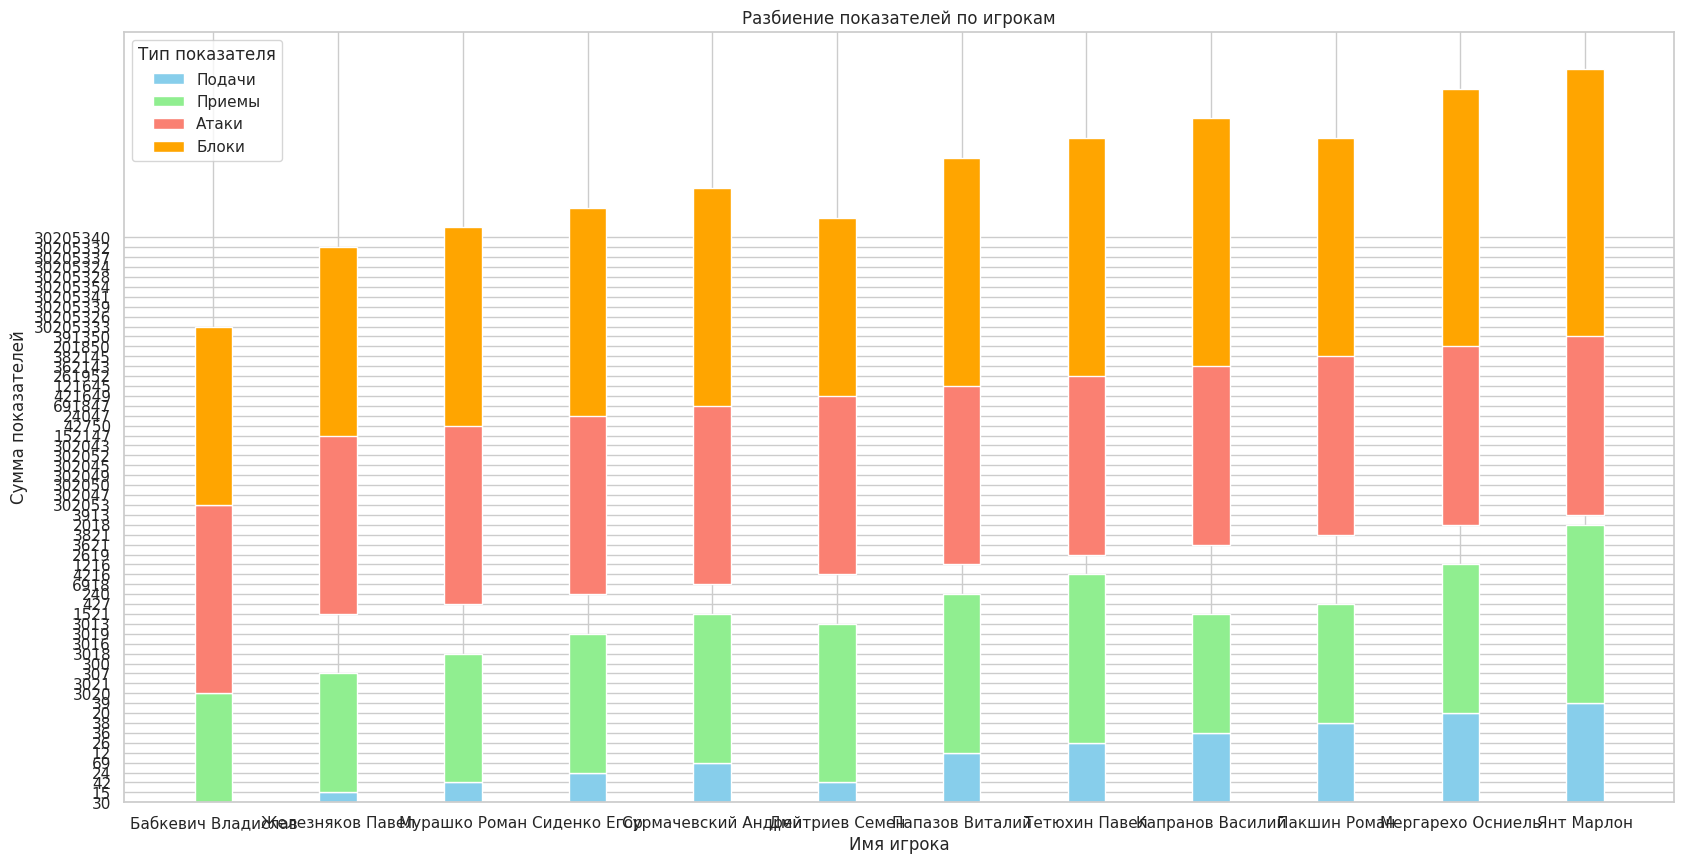

In [51]:
# здесь попросила дипсик помочь с началом кода, потом меняла его сама (Полина писала в чате, что так делать ок). мне не нравится, что он сделал
# я начала это фиксить, пока проблемы с форматом видимо. чуть позже все добью
igrok = topmpldf['Игрок']
podacha = topmpldf['Подачи']
priyom = topmpldf['Приемы']
ataka = topmpldf['Атаки']
blok = topmpldf['Блоки']

x = np.arange(len(igrok))
width = 0.3

plt.figure(figsize=(20, 10))
plt.bar(x, podacha, width, label='Подачи', color='skyblue')
plt.bar(x, priyom, width, bottom=podacha, label='Приемы', color='lightgreen')
plt.bar(x, ataka, width, bottom=podacha + priyom, label='Атаки', color='salmon')
plt.bar(x, blok, width, bottom=podacha + priyom + ataka, label='Блоки', color='orange')

plt.xlabel('Имя игрока')
plt.ylabel('Сумма показателей')
plt.title('Разбиение показателей по игрокам')
plt.xticks(x, igrok)
plt.legend(title='Тип показателя')

plt.show()


# Поиск крутых клубов по топ-игрокам (мужчины):

*И здесь, и для женщин, я беру выборку из топ-60 игроков, чтобы смотреть клубы по ним (изначально в датасете мужчин 258, женщин – 232).*

In [88]:
url = 'https://volley.ru/calendar/01J1VV7JAR7KZS011D2BDE00D5/statistics'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

tables = soup.find_all('table')
ssylki = []

hrefs = tables[0].find_all('a')
for hre in hrefs:
 hre = str(hre) # вытащили список ссылок на страницы игроков
 index = hre.find('>')
 #print('https://volley.ru' + str(hre[9:44])) # сделали их корректными ссылками
 ssylki.append('https://volley.ru' + str(hre[9:44]))
ssylki # получили в адекватном виде список ссылкок

['https://volley.ru/players/01FQH659A2PK7V0G7YHJPT1YBC',
 'https://volley.ru/players/01GWJ7ZMYRQM2Q0ZYKW2D31XMM',
 'https://volley.ru/players/01GGF1PDDKN6T00C0FQCWP0XGT',
 'https://volley.ru/players/01GWJ89PS8KYYM1754Z3YZ1AFK',
 'https://volley.ru/players/01GGEWNTA0VGWC0V7RP4RJ0N00',
 'https://volley.ru/players/01GGCHA2NARQR70SF6NRYH001X',
 'https://volley.ru/players/01GGF39QXSE3R01PNFN7YM0HFF',
 'https://volley.ru/players/01GGF1P8C91MAT0XTVECGS1YB8',
 'https://volley.ru/players/01GDFYY2HZYVA11EYCBV3A0NJA',
 'https://volley.ru/players/01G79HKA0SXWBZ0QEY9NFF0G9R',
 'https://volley.ru/players/01J5N83Q6DHKK00RM0QD3N1E4F',
 'https://volley.ru/players/01J5RF7GKKKY350CT277Y21MP7',
 'https://volley.ru/players/01GGF0FDYZ6GY2193ZQ0WH0S4F',
 'https://volley.ru/players/01GGEQ790MDQ0H12HMKNJ00QJ9',
 'https://volley.ru/players/01H8BFG11A3H0G0EJCZBF01DYB',
 'https://volley.ru/players/01GGF03M3DD1B618EGJGWW1GR2',
 'https://volley.ru/players/01H8BFG1199F1R0THFHRKV0JE8',
 'https://volley.ru/players/01H

In [89]:
clubs = [] # в этой ячейке мы сделали список клубов сооответственно игрокам

for i in range(60):
  ssylka = ssylki[i]
  response = requests.get(ssylka)
  encoding = chardet.detect(response.content)['encoding']
  html = response.content.decode(encoding)
  soup = BeautifulSoup(html, 'lxml')
  html_urls = soup.find_all('a', {'class': 'itext-40'})
  # print(html_urls[0].text)
  clubs.append(html_urls[0].text)

In [90]:
# хочу список клубов словарем, где ключ -- название, а значение -- количество повторений: дальше мы с этой инфой будем строить графики
clubs_dict = {}
for item in clubs:
    if item in clubs_dict:
        clubs_dict[item] += 1
    else:
        clubs_dict[item] = 1
print(clubs_dict)

{' Зенит, Санкт-Петербург': 5, ' АСК, Нижний Новгород': 4, ' Енисей, Красноярск': 4, ' Кузбасс, Кемерово': 4, ' Динамо-Урал, Уфа': 5, ' Газпром-Югра, Сургут': 3, '  Белогорье, Белгород': 4, ' Факел Ямал, Новый Уренгой': 5, '  Динамо-ЛО, Ленинградская обл.': 4, ' Оренбуржье, Оренбург': 3, ' МГТУ, Москва': 2, '  Зенит-Казань, Казань': 4, ' Динамо, Москва': 6, '  Нова, Новокуйбышевск': 1, ' Локомотив, Новосибирск': 6}


Визуализация рейтинга клубов:

**Аналогично для женщин:**

In [91]:
url = 'https://volley.ru/calendar/01J1YDG9TCC2MJ1RN5WM6H04C6/statistics'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']  # определяем кодировку
html = response.content.decode(encoding)  # декодируем с норм кодировкой
soup = BeautifulSoup(html, 'lxml')

# достаем имена
html_wnames = soup.find_all('td', {'data-field': 'name'})

wnames = []
for i in html_wnames:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('a')
  wnames.append(s[0].text)

# результаты подач
html_wserves = soup.find_all('td', {'data-field': 'total_serve_point'})

wserves = []
for i in html_wserves[1:]:
  wserves.append(i.text)

# процент отличных приемов
html_wdigs = soup.find_all('td', {'class': 'stat-table-5', 'data-field': 'total_receive_excellent'})
wdigs = []
for i in html_wdigs[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    wdigs.append(s)
  else:
    wdigs.append('0')

# процент эффективных атак
html_whits = soup.find_all('td', {'class': 'stat-table-6', 'data-field': 'total_attack_point_percent'})
whits = []
for i in html_whits[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    hits.append(s)
  else:
    hits.append('0')

# очки на блоке
html_wblocks = soup.find_all('td', {'class': 'stat-table-7', 'data-field': 'total_block'})

wblocks = []
for i in html_wblocks[1:]:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('span', {'class': 'ts-table__active-cell'})
  if s != []:
    s = s[0].text
    if '%' in s:
      s = s[:len(i) - 1]
    if '+' in s:
      s = s[1:]
    wblocks.append(s)
  else:
    wblocks.append('0')


print(wnames)
print(wserves)
print(wdigs)
print(whits)
print(wblocks)

['Каракурт Эбрар', 'Бирюкова Ольга', 'Гончарова Наталия', 'Гарелик Анастасия', 'Боговская Мария', 'Чернова Анастасия', 'Мартинес Брайелин', 'Воронкова Ирина', 'Руссу Виктория', 'Богданова Алина', 'Касаткина Нина', 'Коржова Владислава', 'Распутина Валерианна', 'Фитисова Елизавета', 'Боброва Виктория', 'Симонова Карина', 'Геращенкова Екатерина', 'Карполь Елизавета', 'Романова Валерия', 'Мазина Елизавета', 'Смирнова Надежда', 'Тица Бранка', 'Гатина Светлана', 'Селиверстова Наталья', 'Лазарева Ангелина', 'Мамедова Александра', 'Гатина Екатерина', 'Халецкая Мария', 'Пушина Виктория', 'Воробьева Мария', 'Столбова Юлия', 'Храбрая Юлия', 'Костючик Вера', 'Лебедкина Ксения', 'Симоненко Ярослава', 'Мельникова Анна', 'Ковалева Полина', 'Жаброва Анастасия', 'Сергеева Варвара', 'Столяр Надежда', 'Ваганова Ольга', 'Сокольчик Екатерина', 'Беликова Полина', 'Емелина Ангелина', 'Павлова Елизавета', 'Антонова Вера', 'Лукьянова Елизавета', 'Шевчук Валерия', 'Гонсалес Гайла', 'Синицкая Юлия', 'Протопопова

# Поиск топ клубов (женщины):

In [84]:
url = 'https://volley.ru/calendar/01J1YDG9TCC2MJ1RN5WM6H04C6/statistics'
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

tables = soup.find_all('table')
wssylki = []

whrefs = tables[0].find_all('a')
for whre in whrefs:
 whre = str(whre) # вытащили список ссылок на страницы игроков
 windex = whre.find('>')
 #print('https://volley.ru' + str(hre[9:44])) # сделали их корректными ссылками
 wssylki.append('https://volley.ru' + str(whre[9:44]))

wclubs = []
for i in range(60):
  wssylka = wssylki[i]
  response = requests.get(wssylka)
  encoding = chardet.detect(response.content)['encoding']
  html = response.content.decode(encoding)
  soup = BeautifulSoup(html, 'lxml')
  html_urls = soup.find_all('a', {'class': 'itext-40'})
  wclubs.append(html_urls[0].text)

In [85]:
wclubs_dict = {}
for item in wclubs:
    if item in wclubs_dict:
        wclubs_dict[item] += 1
    else:
        wclubs_dict[item] = 1
print(wclubs_dict)

{' Локомотив, Калининградская обл.': 3, ' Заречье-Одинцово, Московская обл.': 5, '  Динамо-Москва': 5, ' Ленинградка, Санкт-Петербург': 4, ' Динамо, Краснодар': 5, ' Динамо-Ак Барс, Казань': 4, ' Динамо-Метар, Челябинск': 5, ' Минчанка': 4, ' Омичка, Омская обл.': 3, ' Енисей, Красноярск': 4, ' Уралочка-НТМК, Свердловская обл.': 6, ' Тулица, Тульская обл.': 5, ' Спарта, Нижний Новгород': 4, '  Протон, Саратов': 3}


In [92]:
# еще хочу такой график и для женщин, и для мужчин. сделаем общий словарь и аналогичные штуки для графиков:
totalclubs = clubs + wclubs
totalclubs_dict = {}
for item in totalclubs:
    if item in totalclubs_dict:
        totalclubs_dict[item] += 1
    else:
        totalclubs_dict[item] = 1
print(totalclubs_dict)

{' Зенит, Санкт-Петербург': 5, ' АСК, Нижний Новгород': 4, ' Енисей, Красноярск': 8, ' Кузбасс, Кемерово': 4, ' Динамо-Урал, Уфа': 5, ' Газпром-Югра, Сургут': 3, '  Белогорье, Белгород': 4, ' Факел Ямал, Новый Уренгой': 5, '  Динамо-ЛО, Ленинградская обл.': 4, ' Оренбуржье, Оренбург': 3, ' МГТУ, Москва': 2, '  Зенит-Казань, Казань': 4, ' Динамо, Москва': 6, '  Нова, Новокуйбышевск': 1, ' Локомотив, Новосибирск': 6, ' Локомотив, Калининградская обл.': 3, ' Заречье-Одинцово, Московская обл.': 5, '  Динамо-Москва': 5, ' Ленинградка, Санкт-Петербург': 4, ' Динамо, Краснодар': 5, ' Динамо-Ак Барс, Казань': 4, ' Динамо-Метар, Челябинск': 5, ' Минчанка': 4, ' Омичка, Омская обл.': 3, ' Уралочка-НТМК, Свердловская обл.': 6, ' Тулица, Тульская обл.': 5, ' Спарта, Нижний Новгород': 4, '  Протон, Саратов': 3}


Дальше строим круговые диаграммы для клубов, у которых несколько игроков входит в топ-60. Хочу посмотреть, какие клубы входят в топ, и насколько равномерное между ними распределение.

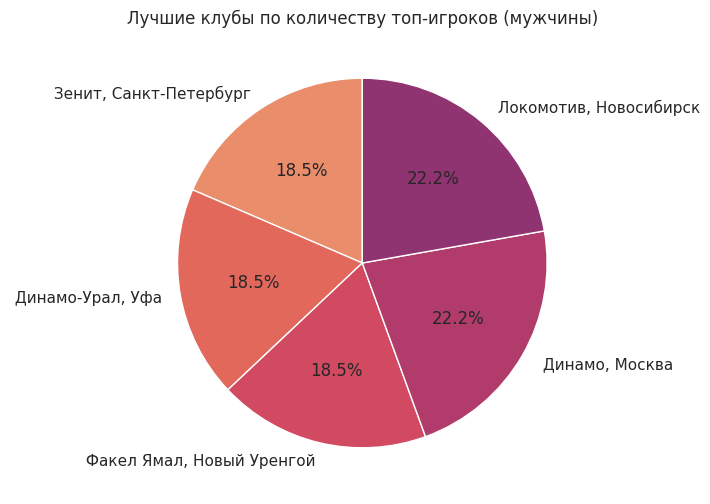

In [93]:
dfmen = pd.DataFrame.from_dict(clubs_dict, orient='index', columns=['Игроки'])
filtered_dfmen = dfmen.drop(dfmen[dfmen['Игроки'] < 5].index)
#print(filtered_dfmen)
plt.figure(figsize=(8, 6))
plt.pie(filtered_dfmen['Игроки'], labels=filtered_dfmen.index, autopct='%1.1f%%', startangle=90, colors = sns.color_palette('flare'))
plt.title('Лучшие клубы по количеству топ-игроков (мужчины)')
plt.show()

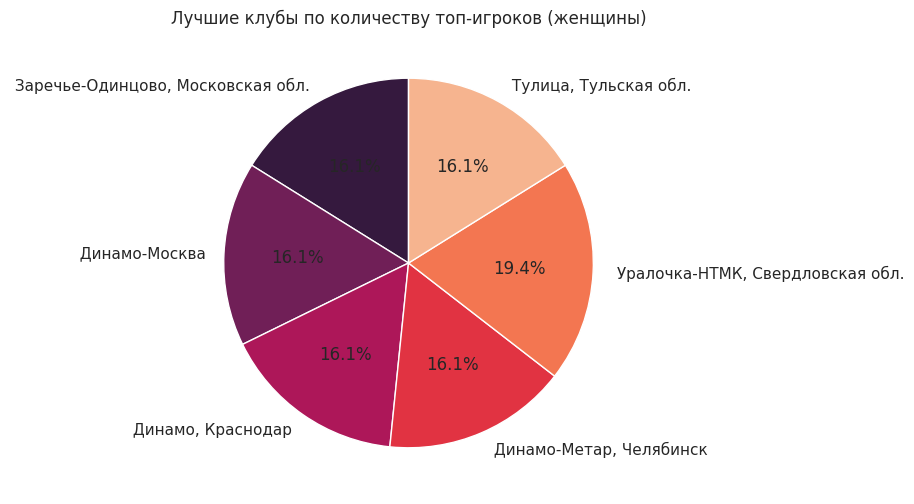

In [94]:
dfwomen = pd.DataFrame.from_dict(wclubs_dict, orient='index', columns=['Игроки'])
filtered_dfwomen = dfwomen.drop(dfwomen[dfwomen['Игроки'] < 5].index)
plt.figure(figsize=(8, 6))
plt.pie(filtered_dfwomen['Игроки'], labels=filtered_dfwomen.index, autopct='%1.1f%%', startangle=90, colors = sns.color_palette('rocket'))
plt.title('Лучшие клубы по количеству топ-игроков (женщины)')
plt.show()

In [95]:
from palettable import colorbrewer, cubehelix, scientific, cartocolors
print(dir(scientific.sequential))  # чекаем доступные палитры

['Acton_10', 'Acton_10_r', 'Acton_11', 'Acton_11_r', 'Acton_12', 'Acton_12_r', 'Acton_13', 'Acton_13_r', 'Acton_14', 'Acton_14_r', 'Acton_15', 'Acton_15_r', 'Acton_16', 'Acton_16_r', 'Acton_17', 'Acton_17_r', 'Acton_18', 'Acton_18_r', 'Acton_19', 'Acton_19_r', 'Acton_20', 'Acton_20_r', 'Acton_3', 'Acton_3_r', 'Acton_4', 'Acton_4_r', 'Acton_5', 'Acton_5_r', 'Acton_6', 'Acton_6_r', 'Acton_7', 'Acton_7_r', 'Acton_8', 'Acton_8_r', 'Acton_9', 'Acton_9_r', 'Bamako_10', 'Bamako_10_r', 'Bamako_11', 'Bamako_11_r', 'Bamako_12', 'Bamako_12_r', 'Bamako_13', 'Bamako_13_r', 'Bamako_14', 'Bamako_14_r', 'Bamako_15', 'Bamako_15_r', 'Bamako_16', 'Bamako_16_r', 'Bamako_17', 'Bamako_17_r', 'Bamako_18', 'Bamako_18_r', 'Bamako_19', 'Bamako_19_r', 'Bamako_20', 'Bamako_20_r', 'Bamako_3', 'Bamako_3_r', 'Bamako_4', 'Bamako_4_r', 'Bamako_5', 'Bamako_5_r', 'Bamako_6', 'Bamako_6_r', 'Bamako_7', 'Bamako_7_r', 'Bamako_8', 'Bamako_8_r', 'Bamako_9', 'Bamako_9_r', 'Batlow_10', 'Batlow_10_r', 'Batlow_11', 'Batlow_11_r',

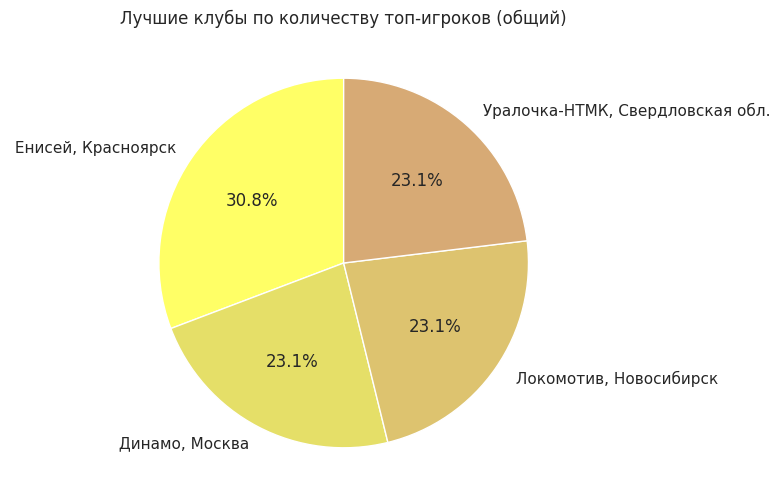

In [97]:
dftotal = pd.DataFrame.from_dict(totalclubs_dict, orient='index', columns=['Игроки'])
filtered_dftotal = dftotal.drop(dftotal[dftotal['Игроки'] < 6].index)
# у меня закончились красивые палитры, поэтому я погуглила, как можно добавить другие. я очень хочу, чтобы дашборд по цветам мэтчился с презой
from palettable.scientific.sequential import Buda_10_r
plt.figure(figsize=(8, 6))
plt.pie(filtered_dftotal['Игроки'], labels=filtered_dftotal.index, autopct='%1.1f%%', startangle=90, colors=Buda_10_r.mpl_colors[:len(filtered_dftotal)])
plt.title('Лучшие клубы по количеству топ-игроков (общий)')
plt.show()

In [98]:
# щас будем пилить дашборд
!pip install --upgrade plotly
!pip install dash==2.18.2
!pip install dash-bootstrap-components==1.7.1

In [99]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd
from sklearn.datasets import load_iris
import dash_bootstrap_components as dbc
from dash import dcc
from dash import Dash, dcc, html

# объект приложения Dash
app = Dash(__name__)

# создание html-слоя, в данном случае с одним заголовком
app.layout = html.Div([
html.H1('Hello, World!')
])

if __name__ == '__main__':
  # запуск сервера, обычно на localhost с портом 8080
  app.run_server(jupyter_mode='external')

Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

у меня проблемы с кодом с лекции :(



---


# Любительские соревнования:

Здесь хочу поработать с сайтом с рейтингами любительских соревнований, чтобы понять, как дела с волейболом обстоят в разных вузах.

In [157]:
url = 'https://mrsss.nagradion.ru/tournament39232/table' # пока что тут просто паста старого кода, чуть позже все перепишу
response = requests.get(url)
encoding = chardet.detect(response.content)['encoding']
html = response.content.decode(encoding)
soup = BeautifulSoup(html, 'lxml')

html_teams = soup.find_all('td', {'data-field': 'name'})
teams = []
for i in html_teams:
  new_soup = BeautifulSoup(str(i), 'lxml')
  s = new_soup.find_all('a')
  teams.append(s[0].text)

print(teams)


[]
